## TIME SERIES ANALYSIS

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ AIRPASSENGER DATASET


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.columns=['Month','Npass']

### CONVERT MONTH COLUMN INTO DATE TIME

In [6]:
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.dtypes

Month    datetime64[ns]
Npass             int64
dtype: object

In [8]:
df.index= df['Month']

### DROPING MONTH COLUMN

In [9]:
df=df.drop(columns=['Month'])
df.head()

,Npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### VISUALIZE TIMESERIES DATA

In [10]:
import matplotlib.pyplot as plt

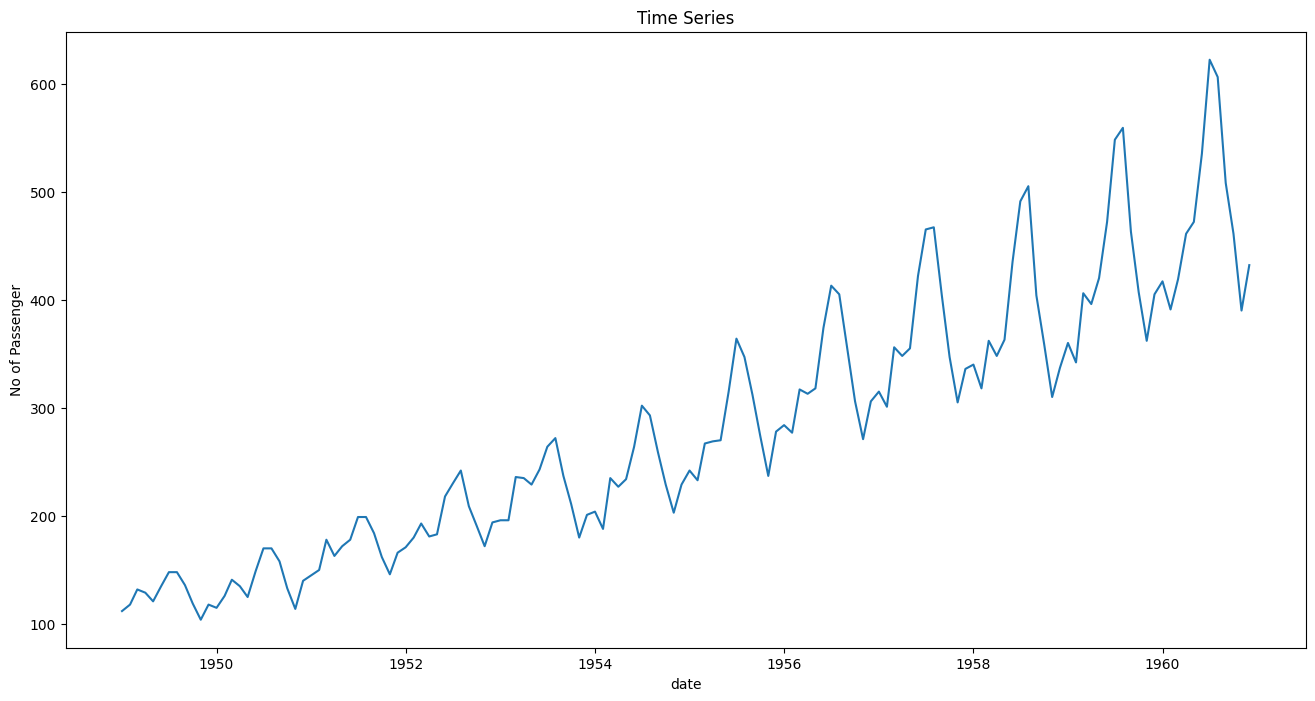

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df['Npass'])
plt.title('Time Series')
plt.xlabel('date')
plt.ylabel('No of Passenger')
plt.show()

## TIME SERIES DECOMPOSITION

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

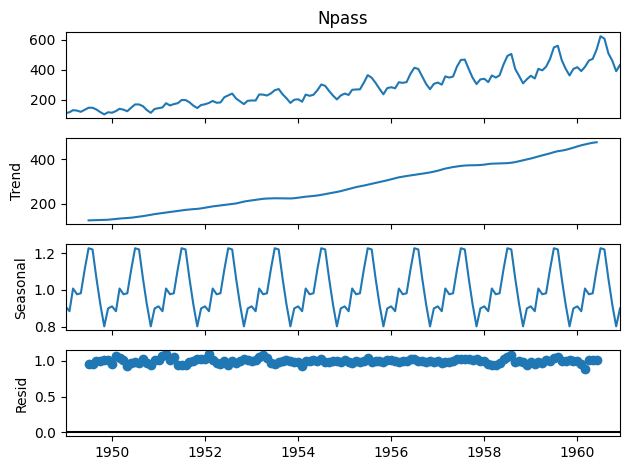

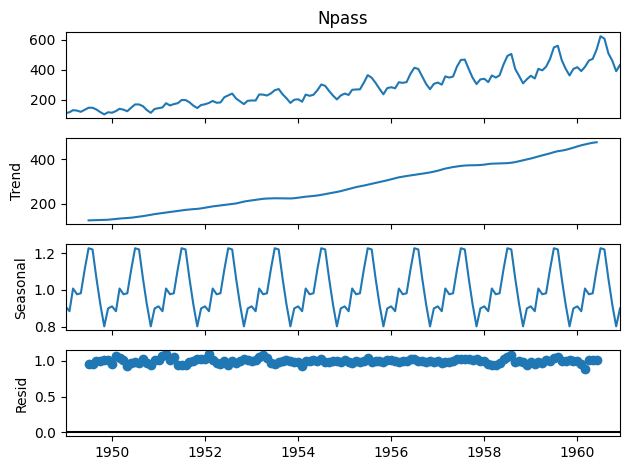

In [13]:
T = seasonal_decompose(df['Npass'],model='multiplicative')
T.plot()

<Axes: xlabel='Month'>

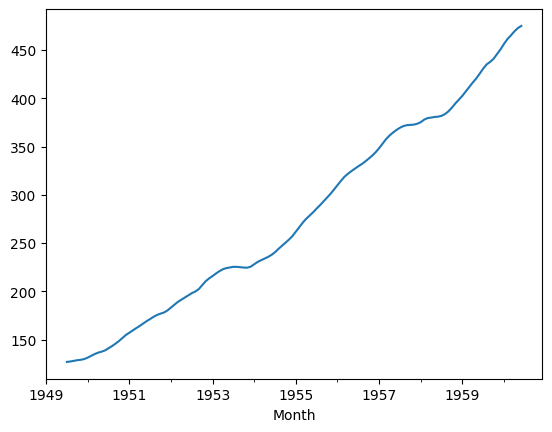

In [14]:
T.trend.plot()

<Axes: xlabel='Month'>

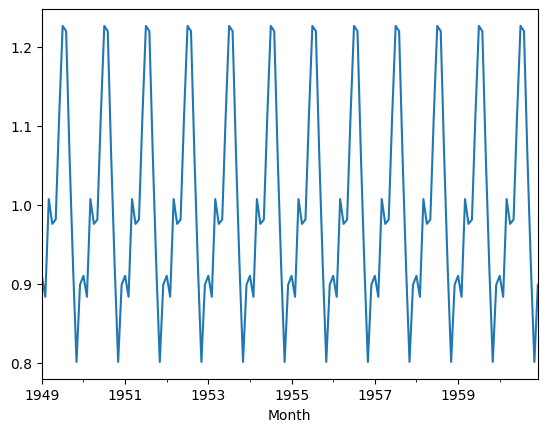

In [15]:
T.seasonal.plot()

<Axes: xlabel='Month'>

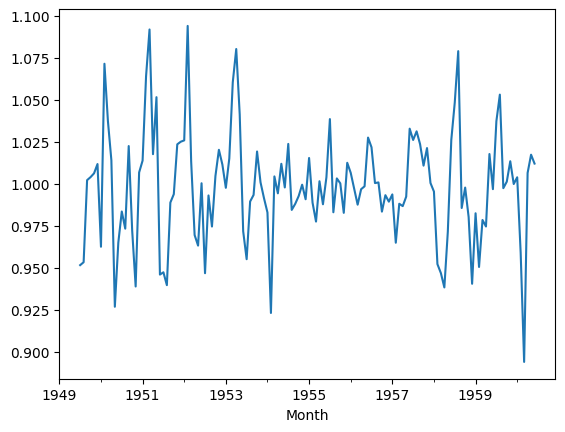

In [16]:
T.resid.plot()

### TIME SERIES FORCASTING USING ARIMA(AUTO REGRESSION AND INTEGRATED MOVING AVERAGE) MODEL

#### INSTALLING PMDARIMA LIBRARY

In [17]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from pmdarima import auto_arima

In [19]:
model = auto_arima(df['Npass'],seasonal=True,m=12)

In [20]:
model.order

(2, 1, 1)

### MODEL IS SELECTED IS ARIMA (P=2,D=1,Q=1)

In [21]:
forcast,conf_interval = model.predict(n_periods=36,return_conf_int=True)

In [22]:
forcast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
Freq: MS, dtype: float64

In [23]:
forcast=forcast.apply(round)

In [24]:
forcast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [25]:
conf_interval

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406],
       [532.69880168, 601.02629843],
       [619.22055901, 689.30000963],
       [602.87921604, 674.31599104],
       [504.63055231, 577.13717502],
       [457.44514984, 530.80834643],
       [386.3030106 , 460.36267117],
       [428.19044593, 502.82497842],
       [433.49653884, 525.08551376],
       [405.10774907, 503.24632483],
       [431.15437638, 535.02002912],
       [471.83916844, 579.79981805],
       [481.87209035, 593.02980929],
       [544.15500525, 657.81338881],
       [630.60709073, 746.26752372],
       [614.17741433, 731.46581272],
       [515.83056926, 634.46491613],
       [468.54219966, 588.30671331],
       [397.2952923 , 518.02321528],
       [439.07790127, 560.63906114],
       [446.32509131, 580.99983223],
       [418.31603539, 558.81598086],
       [444.62194643, 590.36015987],
 

### PLOTING FORCAST WITH ORIGINAL DATA (WITHOUT UPPER LIMT AND LOWER LIMIT)

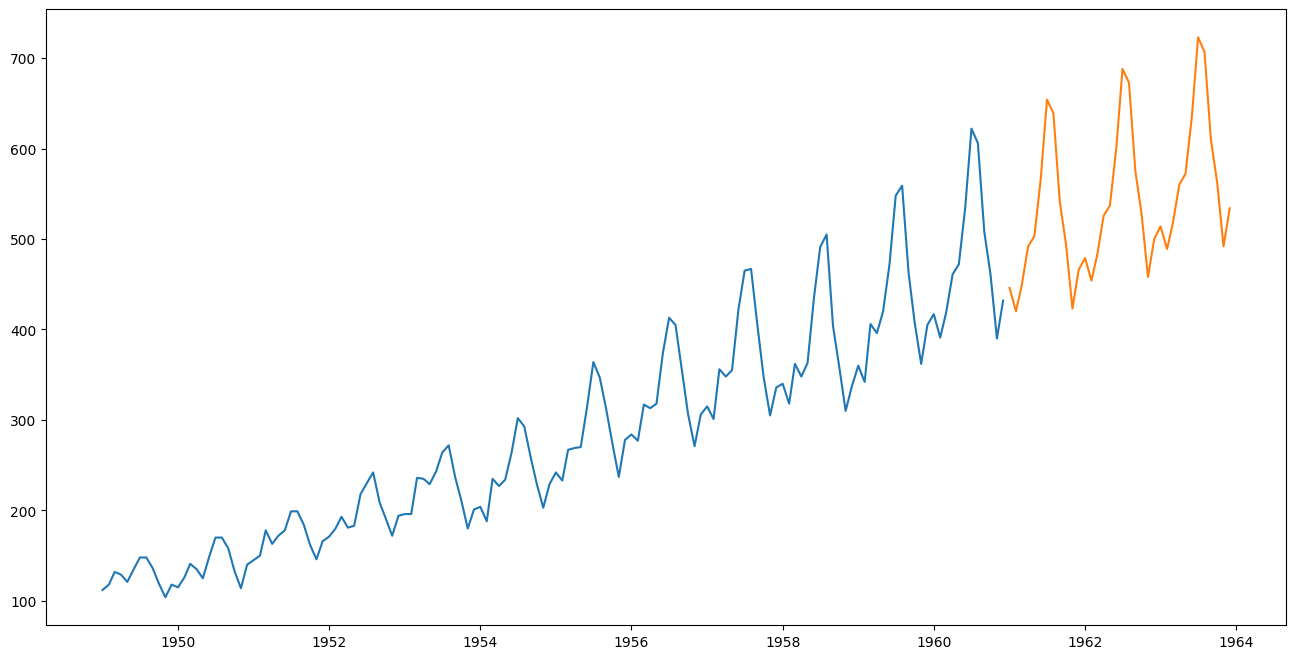

In [26]:
plt.figure(figsize=(16,8))
plt.plot(df['Npass'],label='Original')
plt.plot(forcast,label='Forcast')
plt.show()

### FOR UPPER LIMT AND LOWER LIMT IN FORECASTING

In [27]:
lower=conf_interval[:,0]
upper= conf_interval[:,1]

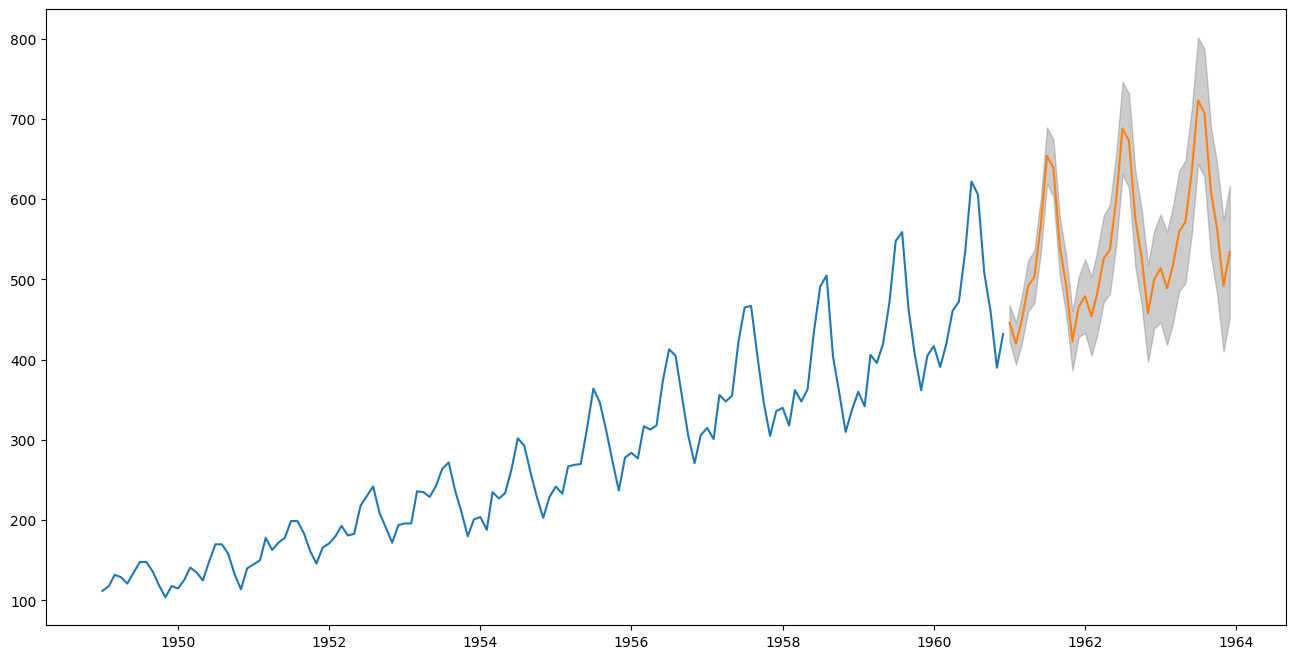

In [30]:
plt.figure(figsize=(16,8))
plt.plot(df['Npass'],label='Original')
plt.plot(forcast,label='Forcast')
plt.fill_between(forcast.index,lower,upper,alpha=0.4,color='gray',label='Confidence interval')
plt.show()

### SAVING FORECASTING DATA

In [32]:
df_pred=forcast.to_frame()
df_pred

,0
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [33]:
df_pred.columns=['Forcasted value']

In [34]:
df_pred['Lower']=lower
df_pred['Upper']=upper

In [35]:
df_pred['Lower']=df_pred['Lower'].apply(round)
df_pred['Upper']=df_pred['Upper'].apply(round)

In [36]:
df_pred

,Forcasted value,Lower,Upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


In [37]:
df_pred.to_csv('Predictions.csv')